In [133]:
# %pylab inline
import math
import pandas as pd
import numpy as np
import shapefile as shp
import matplotlib.pylab as plt
import matplotlib as mpl
%matplotlib inline
pd.options.display.max_rows = 250

In [5]:
aprjune = pd.read_csv('cleaned_chicago_taxi_trips_2016_04_06.csv')
aprjune.head()

,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,payment_type
0,2580.0,0.700000,56,8,34.75,7.85,0.0,Credit Card
1,420.0,0.980000,32,8,6.50,1.00,0.0,Credit Card
2,540.0,1.450000,32,8,7.75,0.00,0.0,Cash
3,660.0,3.068421,8,28,9.00,0.00,0.0,Cash
4,1260.0,0.100000,7,6,12.00,0.00,0.0,Cash


In [6]:
aprjune.describe()

,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls
count,4.622772e+06,4.622772e+06,4.622772e+06,4.622772e+06,4.622722e+06,4.622722e+06,4.622722e+06
mean,8.388809e+02,4.539979e+00,2.273636e+01,2.177695e+01,1.344755e+01,1.569580e+00,1.312705e-03
std,1.009160e+03,3.353846e+01,1.904990e+01,1.784426e+01,2.226104e+01,2.652303e+00,5.114400e-01
min,1.000000e+00,4.649123e-03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.600000e+02,9.000000e-01,8.000000e+00,8.000000e+00,6.250000e+00,0.000000e+00,0.000000e+00
50%,6.000000e+02,1.673684e+00,2.200000e+01,2.200000e+01,8.500000e+00,0.000000e+00,0.000000e+00
75%,9.600000e+02,3.500000e+00,3.200000e+01,3.200000e+01,1.400000e+01,2.000000e+00,0.000000e+00
max,3.742642e+05,3.300000e+03,7.700000e+01,7.700000e+01,9.600480e+03,4.500000e+02,9.999900e+02


In [7]:
aprjune = aprjune[aprjune.payment_type != 'Cash']

In [48]:
aprjune['tips'].median()

2.0

In [144]:
aj_tips = aprjune.groupby(['pickup_community_area'], as_index=True)['tips']#.agg(['median','count'])

In [97]:
aj_tips.sort_values(by=['median'], ascending=False)

,median,count
pickup_community_area,,
76,9.300,193780
56,7.450,58773
62,7.300,168
75,5.400,25
65,5.300,22
18,5.275,20
72,5.000,43
12,4.675,122
47,4.600,3


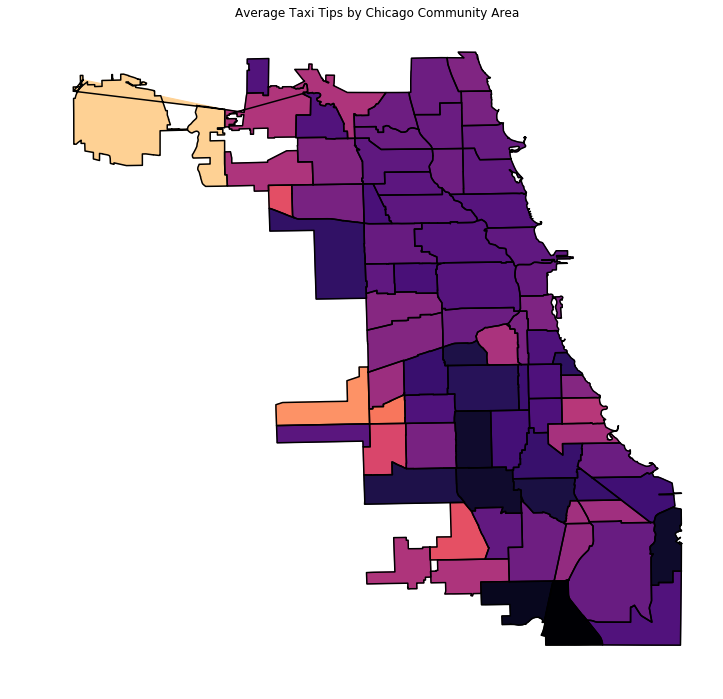

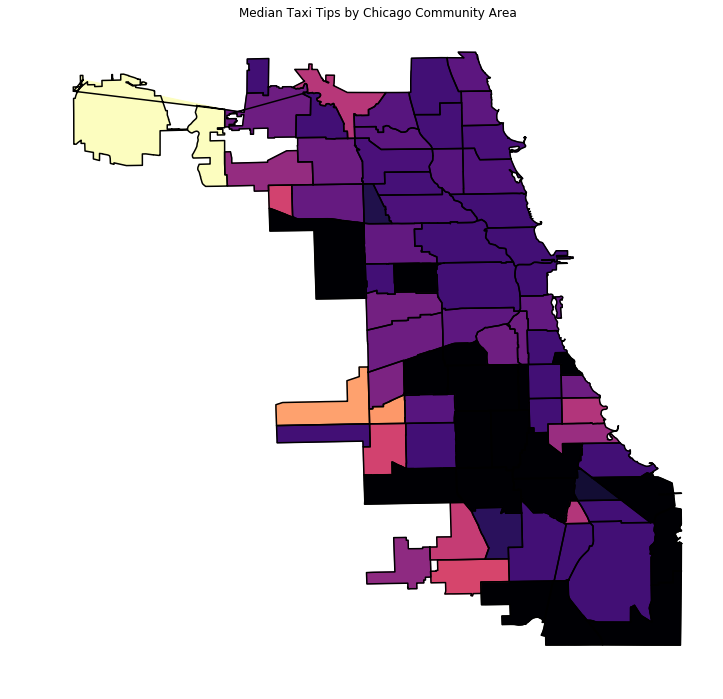

In [143]:
sf = shp.Reader("community_areas.shp")
plt.figure(figsize=(12,12))
cmap = plt.get_cmap('magma')
norm = mpl.colors.Normalize(vmin=0,vmax=9.3)
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y,color="Black")
    if int(shape.record[0]) in aj_tips.groups:
        if aj_tips.get_group(int(shape.record[0])).mean() <= 0:
            plt.fill(x,y,color=cmap(0))
        else:
            plt.fill(x,y,color=cmap(norm(aj_tips.get_group(int(shape.record[0])).mean())))
    else:
        plt.fill(x,y,color=cmap(0))
plt.title('Average Taxi Tips by Chicago Community Area')
plt.axis('off')

plt.figure(figsize=(12,12))
cmap = plt.get_cmap('magma')
norm = mpl.colors.Normalize(vmin=0,vmax=9.3)
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y,color="Black")
    if int(shape.record[0]) in aj_tips.groups:
        if aj_tips.get_group(int(shape.record[0])).median() <= 0:
            plt.fill(x,y,color=cmap(0))
        else:
            plt.fill(x,y,color=cmap(norm(aj_tips.get_group(int(shape.record[0])).median())))
    else:
        plt.fill(x,y,color=cmap(0))
plt.title('Median Taxi Tips by Chicago Community Area')
plt.axis('off')

plt.show()

(-87.960912931450082,
 -87.503338254954258,
 41.62561834903908,
 42.041963360225161)

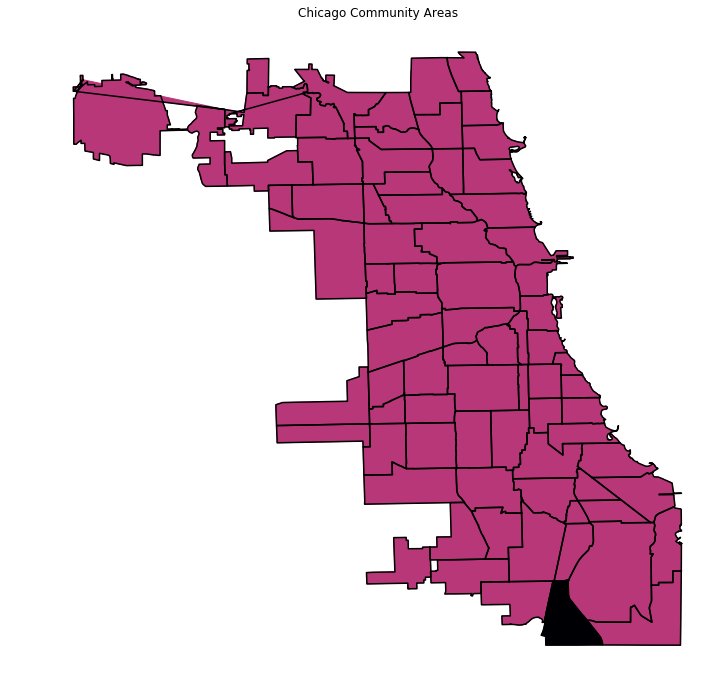

In [146]:
sf = shp.Reader("community_areas.shp") #shp file needed as well as dbf file of same name
plt.figure(figsize=(12,12))
cmap = plt.get_cmap('magma') #color scheme name
norm = mpl.colors.Normalize(vmin=10,vmax=20) #normalize data here, put in your data min and max
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y,color="Black") #outline color
    if int(shape.record[0]) in aj_tips.groups: #shape.record[0] is the community area number
        plt.fill(x,y,color=cmap(norm(15))) #input value for community area in "norm()"
    else:
        plt.fill(x,y,color=cmap(0))
plt.title('Chicago Community Areas')
plt.axis('off')